In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
X_train = pd.read_csv('train.csv').values[:,1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling

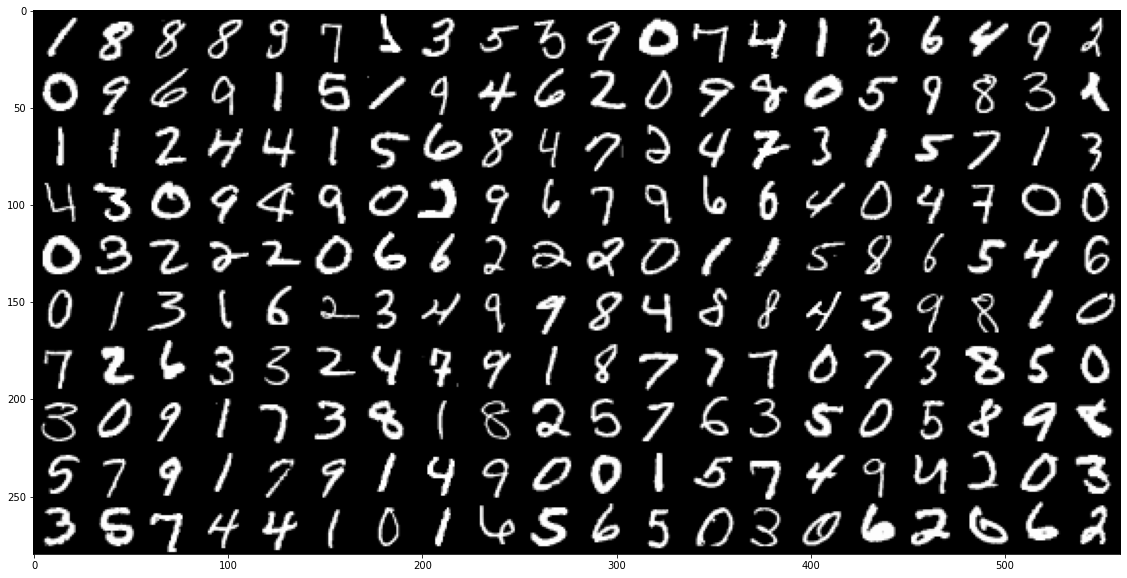

In [4]:
plt.figure(figsize = (20, 10))
plt.imshow(gen_mnist_image(X_train))

In [5]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 10.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 11.12s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 11.11s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.37, time = 10.74s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -89.80, time = 11.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88.18, time = 10.80s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.45, time = 10.52s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.69, time = 10.91s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.80, time = 11.24s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -82.85, time = 10.85s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [6]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

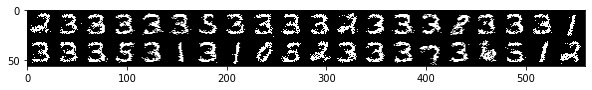

In [7]:
plt.figure(figsize=(10, 20))
plt.imshow(gen_mnist_image(xx))

In [8]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

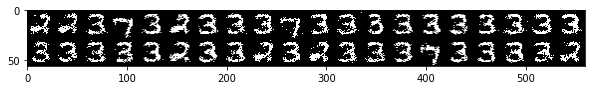

In [9]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

Text(0.5, 0.98, '100 components extracted by RBM')

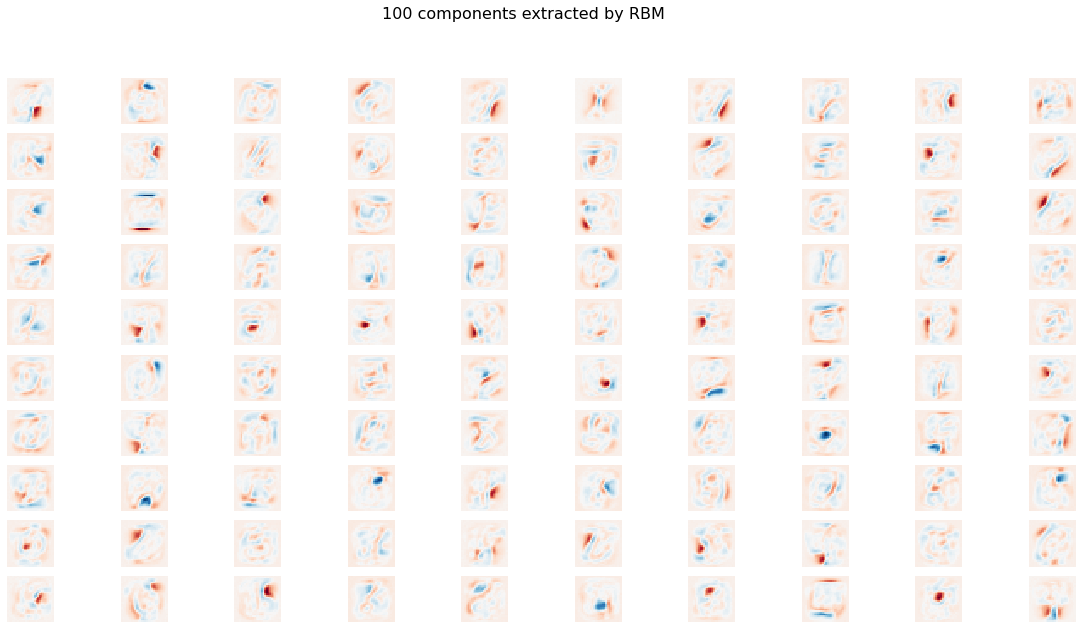

In [10]:
plt.figure(figsize=(20,10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16)